In [1]:
import sys
sys.path.append('../edaf')

In [2]:
from plot_helpers import *
from decomp import *
from loguru import logger
import os, sys, gzip, json
import sqlite3
import pandas as pd
from edaf.core.uplink.preprocess import preprocess_ul
from edaf.core.uplink.analyze_packet import ULPacketAnalyzer
from edaf.core.uplink.analyze_channel import ULChannelAnalyzer
from edaf.core.uplink.analyze_scheduling import ULSchedulingAnalyzer
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from pathlib import Path
import ijson

%load_ext autoreload
%autoreload 2

In [3]:
# Remove default handler
logger.remove()
# Add a new handler with level WARNING
logger.add(sys.stdout, level="ERROR")

16

In [16]:
MEAS_DIR = '../meas-oai5g/'
MEAS_LABEL = 's19'
DB_FILE = MEAS_DIR+MEAS_LABEL+'/'+'res_db.sql'
PLOTS_DIR = './plots/'+MEAS_LABEL+'/'

In [17]:
analyzer = ULPacketAnalyzer(DB_FILE)
uids_arr = range(analyzer.first_ueipid, analyzer.last_ueipid+1)
packets = analyzer.figure_packettx_from_ueipids(uids_arr)

2024-10-12 07:40:10.905 | ERROR    | edaf.core.uplink.analyze_packet:figure_mac_attempts:153 - No harq attempts found


In [ ]:
send_ts = analyzer.nlmt_df['timestamps.client.send.wall'].to_numpy()
send_ts = (send_ts)/1e6
receive_ts = analyzer.nlmt_df['timestamps.server.receive.wall'].to_numpy()
receive_ts = (receive_ts)/1e6
idt = (send_ts[1:-1]-send_ts[0:-2])
e2e_delays = receive_ts-send_ts
ran_delays = np.array(list({packet['id']: get_ran_delay(packet) for packet in packets if get_ran_delay(packet)!=None}.values()))
queueing_delays = np.array(list({packet['id']: get_queueing_delay(packet) for packet in packets if get_queueing_delay(packet)!=None}.values()))
retx_delays = np.array(list({packet['id']: get_retx_delay(packet) for packet in packets if get_retx_delay(packet)!=None}.values()))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


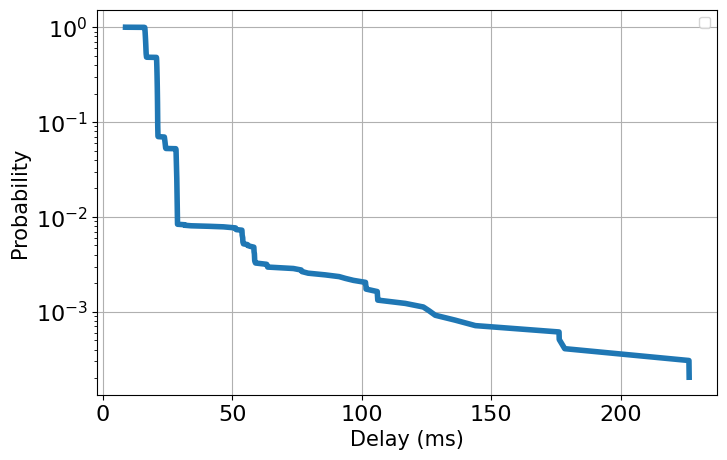

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


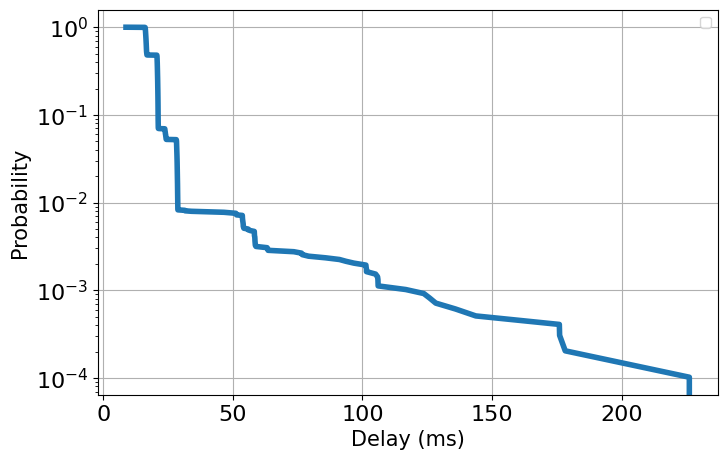

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


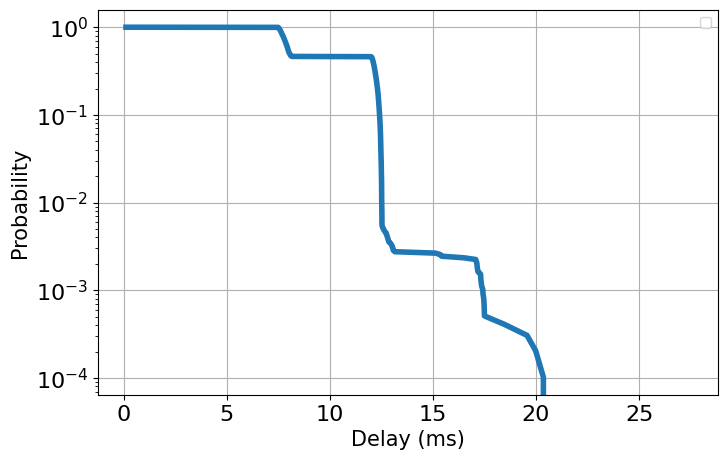

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


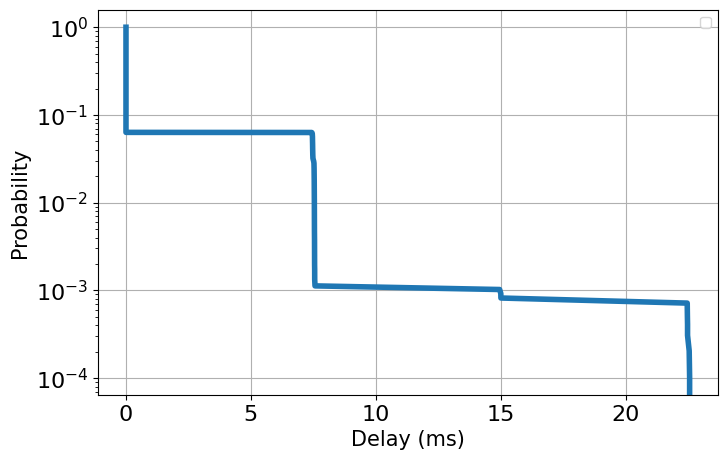

In [7]:
fig, ax  = plot_ccdf(e2e_delays[100:-100], '_', figsize=(8, 5))
plt.savefig(f"{PLOTS_DIR}e2e_delays_ccdf_plot.png", dpi=300, bbox_inches='tight')  # You can change the file format (e.g., .pdf)
plt.show()

fig, ax  = plot_ccdf(ran_delays[100:-100], '_', figsize=(8, 5))
plt.savefig(f"{PLOTS_DIR}ran_delays_ccdf_plot.png", dpi=300, bbox_inches='tight')  # You can change the file format (e.g., .pdf)
plt.show()

fig, ax  = plot_ccdf(queueing_delays[100:-100], '_', figsize=(8, 5))
plt.savefig(f"{PLOTS_DIR}queueing_delays_ccdf_plot.png", dpi=300, bbox_inches='tight')  # You can change the file format (e.g., .pdf)
plt.show()

fig, ax  = plot_ccdf(retx_delays[100:-100], '_', figsize=(8, 5))
plt.savefig(f"{PLOTS_DIR}retx_delays_ccdf_plot.png", dpi=300, bbox_inches='tight')  # You can change the file format (e.g., .pdf)
plt.show()

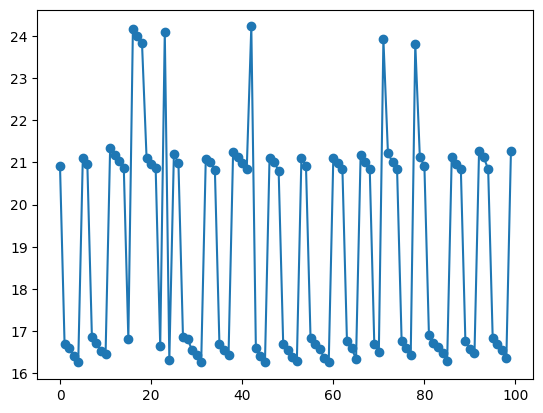

In [19]:
plt.plot(e2e_delays[600:700], marker='o')
